# $$\textbf{Welcome to Beginner Track - Workshop 6 (Guided project part 1)}$$
## $$\text{In this workshop, we will implement a linear regression model from scratch (using numpy).}$$
#### Attendance code: Germany
#### Feedback form: https://forms.gle/hNmvGp69roaKrCuGA
#### Discord: https://bit.ly/ACMdiscord

In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [ ]:
# set the random seed
np.random.seed(0)

## $$\textbf{Function to be learned - a line}$$
### $$f(x)=\pi x + 10$$

In [ ]:
# TO DO: implement f(x) - 1 line
def f(x):
  return np.pi*x + 10

In [ ]:
def f_with_noise(x):
  return f(x) + np.random.normal(0, 20, size=x.shape)

In [ ]:
# TO DO: generate 100 data from [0, 100) for X - 1 line
X = np.arange(0, 100)
y = f_with_noise(X)

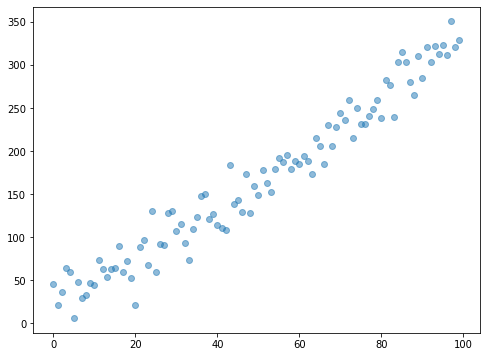

In [ ]:
# plot
plt.figure(figsize=[8, 6])
plt.scatter(X, y, alpha=0.5)

In [ ]:
# TO DO: reshape X into (N, 1) - 1 line
X = X.reshape(-1, 1)

In [ ]:
# shape
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (100, 1)
Shape of y: (100,)


In [ ]:
# TO DO: split training and test data with train_test_split - 1 line
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# $$\textbf{Brief Review of Linear Regression}$$
#### N: number of samples
#### f: number of features
#### X: data; shape = (N, f)
#### y: labels/targets; shape = (N, )
#### W: weights; shape = (f, )
#### b: bias; scalar
#### a: learning rate; scalar
\\
## $$\textbf{Our hypothesis}$$
### $$\hat{y}(X)=XW+b$$
\\
## $$\textbf{Loss function - MSE}$$
### $$L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} \big(y_i-\hat{y_i}\big)^2 $$
\\
## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$
\\
## $$\textbf{Gradient Descent - update W, b accordingly}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:
# Linear Regression Class
class Linear_Regression():
  def __init__(self, num_epochs=50, lr=0.00002, verbose=False):
    """
    Ordinary least squares Linear Regression.

    Linear_Regression fits a linear model with coefficients w = (w1, ..., wf)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters:
      num_epochs - number of epochs
      lr - learning rate
      verbose - creates a plot if set to True

    Attributes:
      epochs - number of epochs
      alpha - learning rate
      verbose - creates a plot if set to True
      weights - numpy.ndarray with shape (f, )
      bias - float
      losses - list containing the loss of each epoch (loss history)
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose
  
  def predict(self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    # TO DO: implement predict (using our hypothesis) - 1 line
    predictions = np.dot(X, self.weights) + self.bias
    return predictions

  def loss(self, y, y_hat):
    """
    Computes the Mean Squared Error (MSE) of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      loss - float
    """
    # TO DO: compute loss (MSE) - 1 line
    mse_calc = np.average((y - y_hat)**2)
    return mse_calc

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect the weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    # TO DO: compute gradients - 2 lines
    dw = (2/n)*np.dot(X.T, (y_hat - y))
    db = (2/n)*np.sum(y_hat - y)
    return dw, db

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns:
      a reference to self
    """
    # initialize weights and bias
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand()
    self.losses = []

    # main loop for training
    for i in range(self.epochs):
      # TO DO: make predictions - 1 line
      predictions = self.predict(X)

      # TO DO: compute loss - 1 line
      loss = self.loss(y, predictions)

      # TO DO: compute gradients - 1 line
      dw, db = self.grads(X, y, predictions)

      # TO DO: update self.weights and self.bias - 2 lines
      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db

      self.losses.append(loss)

    if self.verbose:
      plt.figure(figsize=[8, 6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.losses) + 1), self.losses)
      plt.show()

    return self

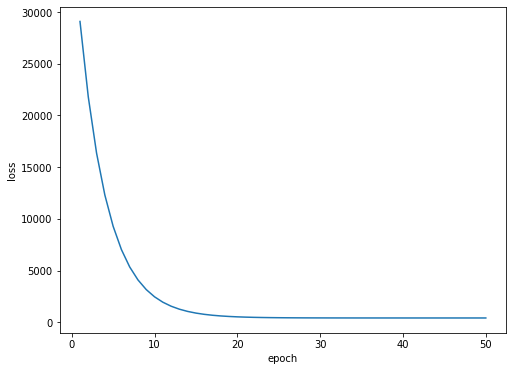

In [ ]:
# TO DO: fit the model to the train data - 1 line
lin_reg = Linear_Regression(verbose=True).fit(X_train, y_train)

In [ ]:
print('weights:', lin_reg.weights)
print('bias:', lin_reg.bias.round(10))

weights: [3.32103687]
bias: 0.6544168378


In [ ]:
# TO DO: make prediction on test data - 1 line
y_pred = lin_reg.predict(X_test)

## Which r2 score do you expect to be higher?

In [ ]:
# r2 score
print('test r2 score:', r2_score(y_test, y_pred).round(3))
print('train r2 score:', r2_score(y_train, lin_reg.predict(X_train)).round(3))

test r2 score: 0.902
train r2 score: 0.952


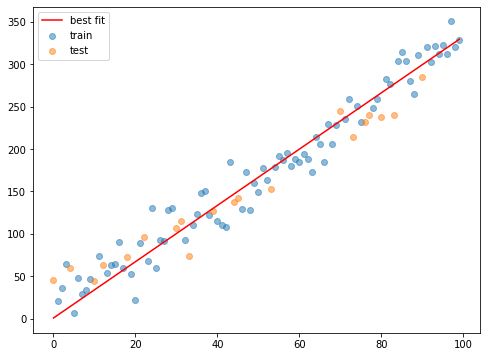

In [ ]:
# plot data
plt.figure(figsize=[8, 6])
plt.scatter(X_train, y_train, alpha=0.5, label='train')
plt.scatter(X_test, y_test, alpha=0.5, label='test')
plt.plot(X, lin_reg.predict(X), color='r', label='best fit')
plt.legend()

## The effect of different learning rates

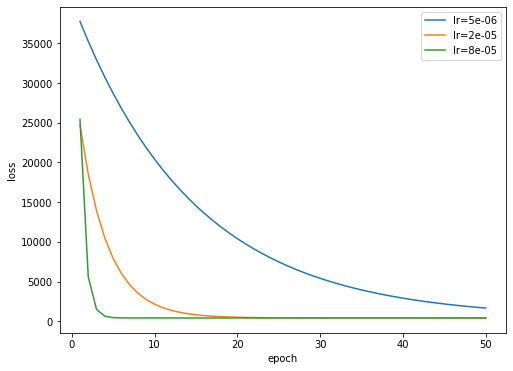

In [ ]:
lr = [0.000005, 0.00002, 0.00008]
plt.figure(figsize=[8, 6])
plt.xlabel('epoch')
plt.ylabel('loss')

for l in lr:
  lin_reg = Linear_Regression(lr=l).fit(X_train, y_train)
  plt.plot(np.arange(1, len(lin_reg.losses) + 1), lin_reg.losses, label=f'lr={l}')

plt.legend()
plt.show()

## Let's apply our model to a real world dataset

In [ ]:
# load the boston dataset with load_boston - 1 line
boston_data = load_boston()

In [ ]:
# documentation
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# TO DO: store the boston dataset in a DataFrame - 1 line
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
df

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]

## Are there any missing values? (This is important if you are collecting your own data)

In [ ]:
# check for any missing values in the DataFrame
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [ ]:
# TO DO: store the data in X and targets in y - 2 lines
X = np.array(df)
y = boston_data.target

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fit (this will take a while to run)
lin_reg2 = Linear_Regression(num_epochs=10**(6), lr=3.2*10**(-6)).fit(X_train, y_train)

In [ ]:
# predict
y_pred = lin_reg2.predict(X_test)

In [ ]:
# r2 score
print('r2 score:', r2_score(y_test, y_pred).round(3))

r2 score: 0.612


## Let's compare our model to sklearn's model! (The moment of truth)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg3 = LinearRegression().fit(X_train, y_train)
print('r2 score:', lin_reg3.score(X_test, y_test).round(3))

r2 score: 0.669


## Not too shabby, eh?
### Bonus challenge: implement an adaptive learning rate for our model
##### An useful article to check out: https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a